In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("sample.csv")

In [8]:
data

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix,Domain_Age,End_Domain,iFrame,Mouse_Over,Web_Forwards,label
0,0,1,1,0,0,1,1,0,0,0,0
1,0,1,1,0,0,1,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,0,1,3,0,0,0,1,0,0,0,0
4,0,1,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4352,0,0,0,0,0,0,1,0,0,0,1
4353,0,0,3,0,0,1,1,0,0,0,1
4354,0,0,0,1,0,0,0,0,0,0,1
4355,0,1,1,0,0,0,0,0,0,0,1


In [9]:
data.shape

(4357, 11)

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix,Domain_Age,End_Domain,iFrame,Mouse_Over,Web_Forwards,label
0,0,1,1,0,0,1,1,0,0,0,1
1,0,1,5,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,1,0,0,0,1
3,0,1,5,1,1,1,1,0,0,0,1
4,0,1,4,1,0,1,1,0,0,0,0


<hr>

In [13]:
# Sepratating & assigning features and target columns to X & y
y = data['label']
X = data.drop('label',axis=1)
X.shape, y.shape

((4357, 10), (4357,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((3485, 10), (872, 10))

In [15]:
# checking the balence of data
s1=0
s0=0
for i in y_train:
    if i==1:
        s1=s1+1
    else:
        s0=s0+1
print(s1," ",s0)

3053   432


<hr>

* Random Forest
* XGBoost
* Gradient Boost 
* Multi-layer Perceptron

In [16]:

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [17]:
ML_Model = []
accuracy = []
recall = []
precision = []
f1 = []

#function to call for storing the results
def storeResults(model, acc,rec,preci,f):
  ML_Model.append(model)
  accuracy.append(round(acc, 3))
  recall.append(round(rec, 3))
  precision.append(round(preci, 3))
  f1.append(round(f, 3))
    

<hr>

#### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

    n_estimators  accuracy
0             10  0.893349
35            45  0.895642
28            38  0.895642
14            24  0.895642
8             18  0.895642
39            49  0.895642
15            25  0.896789
5             15  0.896789
20            30  0.896789
38            48  0.896789
16            26  0.896789
23            33  0.896789
29            39  0.896789
25            35  0.896789
10            20  0.896789
4             14  0.896789
31            41  0.897936
32            42  0.897936
2             12  0.897936
27            37  0.897936
33            43  0.897936
26            36  0.897936
34            44  0.897936
30            40  0.897936
22            32  0.897936
19            29  0.897936
17            27  0.897936
12            22  0.897936
11            21  0.897936
9             19  0.897936
7             17  0.897936
24            34  0.897936
21            31  0.899083
13            23  0.899083
1             11  0.899083
37            47  0.899083
6

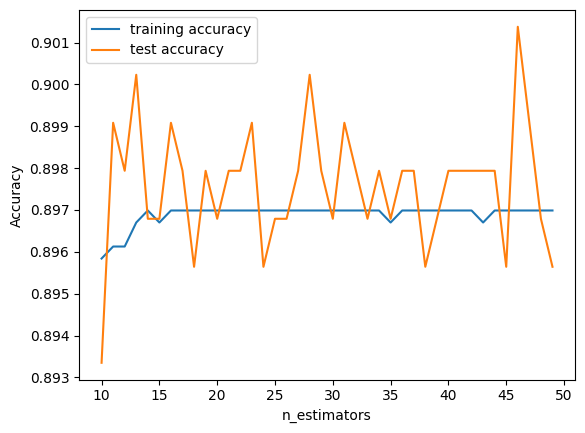

In [19]:
training_accuracy = []
test_accuracy = []
n_esti=[]
accuracy=[]
max=0
depth = range(10,50)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    if forest_test.score(X_test, y_test)>=0.86:
        n_esti.append(n)
        accuracy.append(forest_test.score(X_test, y_test))
        max=forest_test.score(X_test, y_test)

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

df=pd.DataFrame({"n_estimators":n_esti, "accuracy":accuracy})
df=df.sort_values("accuracy")
print(df)

In [20]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
forest = RandomForestClassifier()
param_grid = {'n_estimators': [11,13,20,24,42],
'max_depth': [4,5,6],
'max_features': ['auto', 'sqrt'],
'bootstrap': [True]
}

forest_random = RandomizedSearchCV(estimator = forest, param_distributions = param_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [21]:
forest_random.fit(X_train, y_train)

C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\Teju\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [4, 5, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [11, 13, 20, 24, 42]},
                   random_state=42, verbose=2)

In [22]:
forest_random.best_params_

{'n_estimators': 24, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': True}

In [23]:
forest_pred= forest_random.predict(X_test)

In [24]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.71      0.12      0.21        97
           1       0.90      0.99      0.94       775

    accuracy                           0.90       872
   macro avg       0.80      0.56      0.58       872
weighted avg       0.88      0.90      0.86       872



In [25]:

storeResults('Random Forest',
accuracy_score(y_test,forest_pred),
recall_score(y_test,forest_pred),
precision_score(y_test,forest_pred),
f1_score(y_test,forest_pred))

<hr>

#### XGBoost 

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

In [28]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [29]:
xgb_pred = xgb.predict(X_test)

In [30]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.67      0.16      0.26        97
           1       0.90      0.99      0.95       775

    accuracy                           0.90       872
   macro avg       0.79      0.58      0.60       872
weighted avg       0.88      0.90      0.87       872



In [31]:

storeResults('XGBoost',
accuracy_score(y_test,xgb_pred),
recall_score(y_test,xgb_pred),
precision_score(y_test,xgb_pred),
f1_score(y_test,xgb_pred))

<hr>

#### Gradient Boost

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

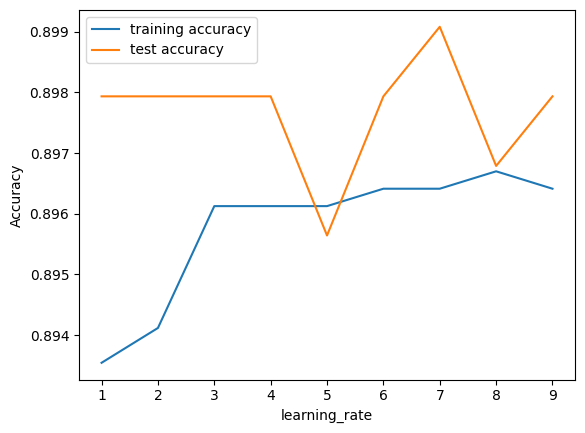

In [33]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

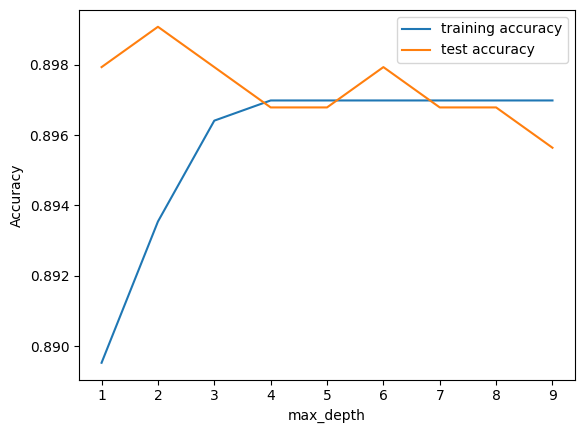

In [34]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
gbc = XGBClassifier()
param_grid = {'learning_rate':[0.5,0.6,0.7,0.8,0.9],
'max_depth':[3,4,5]
}

gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, scoring='roc_auc',n_jobs=10,cv=10)

In [36]:
gbc_random.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=10,
                   param_distributions={'learning_rate': [0.5, 0.6, 0.7, 0.8,
                                                          0.9],
                                        'max_depth': [3, 4, 5]},
                   scoring='roc_auc')

In [37]:
gbc_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
gbc_pred = gbc_random.predict(X_test)

In [39]:
print(classification_report(y_test,gbc_pred))

              precision    recall  f1-score   support

           0       0.70      0.16      0.27        97
           1       0.90      0.99      0.95       775

    accuracy                           0.90       872
   macro avg       0.80      0.58      0.61       872
weighted avg       0.88      0.90      0.87       872



In [40]:

storeResults('Gradient Boost',
accuracy_score(y_test,gbc_pred),
recall_score(y_test,gbc_pred),
precision_score(y_test,gbc_pred),
f1_score(y_test,gbc_pred))

<hr>

#### Multilayer Perceptron

In [41]:
from sklearn.neural_network import MLPClassifier

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# defining parameter range
mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(100,),(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001,0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp_random = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid,n_jobs=-1,cv=5)

In [43]:
mlp_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001, 0.05],
                                        'hidden_layer_sizes': [(100,), (50,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['adam']})

In [44]:
mlp_pred = mlp_random.predict(X_test)

In [45]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.75      0.15      0.26        97
           1       0.90      0.99      0.95       775

    accuracy                           0.90       872
   macro avg       0.83      0.57      0.60       872
weighted avg       0.89      0.90      0.87       872



In [46]:

storeResults('Multi-Layer Perceptron',
accuracy_score(y_test,mlp_pred),
recall_score(y_test,mlp_pred),
precision_score(y_test,mlp_pred),
f1_score(y_test,mlp_pred))

<hr>

#### Comparision

In [50]:
ML_Model

['Random Forest', 'XGBoost', 'Gradient Boost', 'Multi-Layer Perceptron']

In [51]:
accuracy

[0.893348623853211,
 0.8990825688073395,
 0.8979357798165137,
 0.9002293577981652,
 0.8967889908256881,
 0.8967889908256881,
 0.8990825688073395,
 0.8979357798165137,
 0.8956422018348624,
 0.8979357798165137,
 0.8967889908256881,
 0.8979357798165137,
 0.8979357798165137,
 0.8990825688073395,
 0.8956422018348624,
 0.8967889908256881,
 0.8967889908256881,
 0.8979357798165137,
 0.9002293577981652,
 0.8979357798165137,
 0.8967889908256881,
 0.8990825688073395,
 0.8979357798165137,
 0.8967889908256881,
 0.8979357798165137,
 0.8967889908256881,
 0.8979357798165137,
 0.8979357798165137,
 0.8956422018348624,
 0.8967889908256881,
 0.8979357798165137,
 0.8979357798165137,
 0.8979357798165137,
 0.8979357798165137,
 0.8979357798165137,
 0.8956422018348624,
 0.9013761467889908,
 0.8990825688073395,
 0.8967889908256881,
 0.8956422018348624,
 0.897,
 0.898,
 0.899,
 0.9]

In [49]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Recall'   : recall,
                        'Precision': precision,
                        'f1_score' : f1
                      })

ValueError: All arrays must be of the same length

In [48]:
# dispalying total result
result

NameError: name 'result' is not defined

In [81]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['f1_score', 'Recall','Accuracy'],ascending=False).reset_index(drop=True)

In [82]:
# dispalying total result
sorted_result

,ML Model,Accuracy,Recall,Precision,f1_score
0,XGBoost,0.855,0.799,0.901,0.847
1,Gradient Boost,0.854,0.797,0.901,0.846
2,Multi-Layer Perceptron,0.845,0.749,0.928,0.829
3,Random Forest,0.833,0.689,0.969,0.806


<hr>

#### Storing the best Model


In [45]:
import pickle

# dump information to that file
# pickle.dump(gbc, open('pickle/model.pkl', 'wb'))